<a href="https://colab.research.google.com/github/mudnaziri/basic-python-syntax/blob/main/Coffee_shope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("/content/Coffee Shop Sales.xlsx")
print(df)

        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_catego

In [4]:
# info function
print(f"Over Veiw of data: {df.info()}")

# 1-5 row of data
print(f"1-5 row of data: {df.head()}")

# Null values
print(f"Null values {df.isnull().sum()}")

# deplicate values
print(f"deplicate values {df.duplicated().sum()}")

# drop duplicate values
df.drop_duplicates(inplace=True)
print(f"drop duplicate values {df.duplicated().sum()}")

# shape of data
print(f"shape of data {df.shape}")

# filling the missing values columns
df.fillna(df.mean(numeric_only=True),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

# Changing the format of date
df["transaction_date"]=pd.to_datetime(df["transaction_date"],format="%d-%m-%y")

#checking is there an negative value present in data
df[df["unit_price"]>=0]

#describe function
print("after Cleaning Data")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB
Over Veiw of data: None
1-5 row of data:    transaction_id transaction_date transaction_time

In [5]:
df["Total_Bill"] = df["transaction_qty"] * df["unit_price"]
print(df)

        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_catego

In [7]:
#------------------
#  PROFIT COUNT
#------------------

df['Cost'] = df['unit_price'] * 0.7
df['Profit'] = df['Total_Bill'] - (df['transaction_qty'] * df['Cost'])
product_profit = df.groupby('product_type')['Profit'].sum().reset_index()
print(product_profit)

             product_type     Profit
0        Barista Espresso  27421.860
1                Biscotti   5938.059
2               Black tea    813.555
3        Brewed Black tea  14379.600
4         Brewed Chai tea  23124.585
5        Brewed Green tea   7155.750
6       Brewed herbal tea  14261.850
7                Chai tea   1290.375
8                Clothing   1848.900
9      Drinking Chocolate    818.412
10            Drip coffee   9595.200
11         Espresso Beans   1668.075
12          Gourmet Beans   2039.400
13  Gourmet brewed coffee  21010.380
14            Green beans    402.000
15              Green tea    441.225
16             Herbal tea    818.925
17          Hot chocolate  21724.800
18      House blend Beans    988.200
19             Housewares   2233.200
20          Organic Beans   2552.850
21      Organic Chocolate    503.880
22  Organic brewed coffee  11323.950
23                 Pastry   7696.797
24          Premium Beans   4375.050
25  Premium brewed coffee  11634.345
2

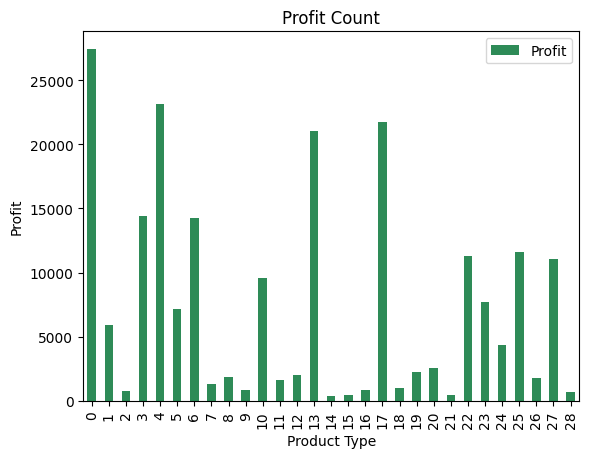

In [10]:
product_profit.plot(kind="bar",color="Seagreen")
plt.xlabel("Product Type")
plt.ylabel("Profit")
plt.title("Profit Count")
plt.show()

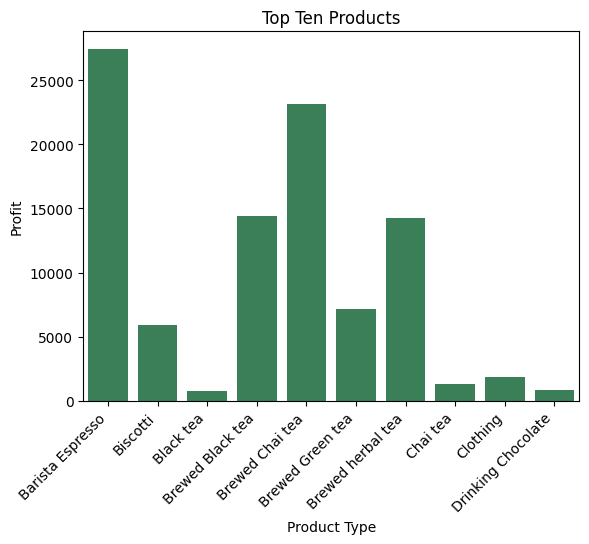

In [14]:
# TOP TEN PRODUCTS
sns.barplot(x=product_profit.head(10)["product_type"],y=product_profit.head(10)["Profit"],color="Seagreen")
plt.xlabel("Product Type")
plt.ylabel("Profit")
plt.title("Top Ten Products")
plt.xticks(rotation=45,ha="right")
plt.show()